# Wien Constant and Black Body Radiation

In [1]:

%matplotlib inline
#from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

# This IPython magic generates a table with version information
#https://github.com/jrjohansson/version_information
#%load_ext version_information
%version_information scipy, numpy, matplotlib

UsageError: Line magic function `%version_information` not found.


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.real_if_close is deprecated and will be removed in SciPy 2.0.0, use numpy.real_if_close instead


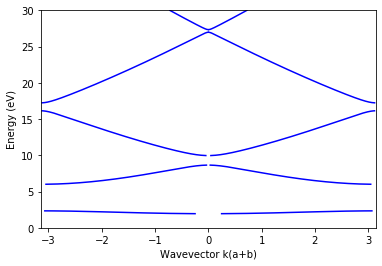

In [3]:
from numpy import abs,arccos,linspace,array,pi
from cmath import sqrt,sin,cos,cosh,sinh
from scipy import real_if_close
import matplotlib.pyplot as plt
import numpy as np
import scipy
from ipywidgets import interact
%matplotlib inline

hbar = 1.05457*10**-34 
echarge = 1.602*10**-19
emass = 9.109*10**-31 

def bandfunc(a,b,energy,v0):
    #b is the width of the potential barriers and a is the distance between them
    #energy is the value of energy in ElectronVolts that we are solving for
    #v0 is the height of the potential barriers in ElectronVolts
    if(energy==v0):
        return(None)
    result = None
    energy = energy*echarge
    v0 = v0*echarge
    b = b*10**-10
    a = a*10**-10
    
    alpha = sqrt((2*emass/hbar**2)*energy)
    beta = sqrt(2*emass*(v0-energy)/hbar**2)
    AlphaBeta_term = (beta**2 - alpha**2) /(2*alpha*beta)
    trace = cos(alpha*a)*cosh(beta*b) + AlphaBeta_term*sin(alpha*a)*sinh(beta*b)
    if abs(trace) < 1:
        result = real_if_close(arccos(trace))
    return(result)
    

def plotband(v0 = 6,a = 2.5,b = 2.5):
    energy_array = linspace(0.1,30,5000)
    #Calulate the positive k values
    k_vals = array([bandfunc(a,b,energy,v0) for energy in energy_array])
    #The negative k-values are just a mirror image of the positive ones
    neg_k_vals = array([-k if k is not None else None for k in k_vals])
    #generate the plot
    plt.plot(k_vals,energy_array,'b');
    plt.plot(neg_k_vals,energy_array,'b');
    plt.axis([-pi,pi, 0,30])
    plt.xlabel('Wavevector k(a+b)')
    plt.ylabel('Energy (eV)')

plotband(6,2.5,2.5)

Alternatively, we can allow the students to interact with the model using sliders. No need for them to modify the code. Note that the calculations are being preformed in real time!

interact(plotband,
         v0=(0,10,0.1),
         a=(0,5,0.1),
         b=(0,5,0.1),
        );

# spherical harmonics in Python SciPy

In [4]:
import scipy as sci
import scipy.special as sp
#Example to calculate Y_4^2
l = 4
m = 2
theta, phi = 0.6, 0.75    # Some arbitrary values of angles in radians
Y42 = sp.sph_harm(m, l, phi, theta) # sph_harm
Y42

(0.02842897832840588+0.40088896207789526j)

In [5]:
z = np.cos(theta)
P42 = sp.lpmv(m,l,z)
P42

9.01048783752695

In [6]:
f = sci.math.factorial
K_norm = np.sqrt((2*l+1)/(4 * np.pi) * f(l-m)/f(l+m))
K_norm

0.044603102903819275

In [7]:
K_norm * P42* np.exp(m*phi*1j) == Y42

True

In [8]:
from numpy import abs,arccos,linspace,array,pi
from cmath import sqrt,sin,cos,cosh,sinh
from scipy import real_if_close
import matplotlib.pyplot as plt
import sympy as sp
import scipy as sci
from ipywidgets import interact

ModuleNotFoundError: No module named 'sympy'

In [9]:
def dotprod(f,g):
    #Scipy does not directly integrates complex functions.
    #You have to break them down into two integrals of the real and imaginary part
    integrand_r = lambda theta, phi: np.real(f(theta, phi) * np.conj(g(theta, phi)) * np.sin(theta))
    integrand_i = lambda theta, phi: np.imag(f(theta, phi) * np.conj(g(theta, phi)) * np.sin(theta))
    ##rr = sci.integrate.dblquad(integrand_r, 0, 2 * np.pi,lambda theta: 0, lambda theta: np.pi)[0]
    rr = sci.integrate.dblquad(integrand_r, 0, 2 * np.pi,lambda theta: 0, lambda theta: np.pi)[0]
    ri = sci.integrate.dblquad(integrand_i, 0, 2 * np.pi,lambda theta: 0, lambda theta: np.pi)[0]
    if np.allclose(rr,0):
        rr = 0
    if np.allclose(ri,0):
        ri=0
    return rr + ri*1j

In [ ]:
# We check the orthogonality of the spherical harmonics:
# Si (l,m) =! (l',m') the inner product must be zero
Y = lambda l, m, theta, phi: sp.sph_harm(m, l, phi, theta)
f = lambda theta, phi: Y(4,3,theta, phi) 
g = lambda theta, phi: Y(4,2,theta, phi) 
dotprod(f,g)

In [11]:
import scipy as sci
import scipy.special as sp
l = 4    #degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

In [12]:
from numpy import abs,arccos,linspace,array,pi
from cmath import sqrt,sin,cos,cosh,sinh
from scipy import real_if_close
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sci
import scipy.special as sp
from ipywidgets import interact

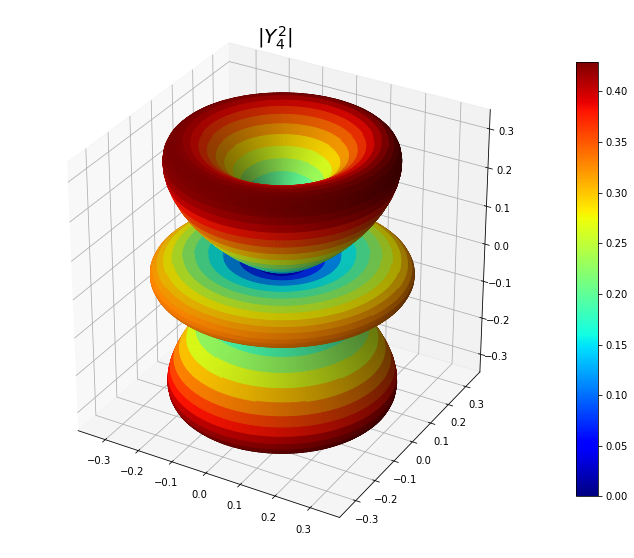

In [13]:

# %matplotlib inline
N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12,10))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^2_ 4|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

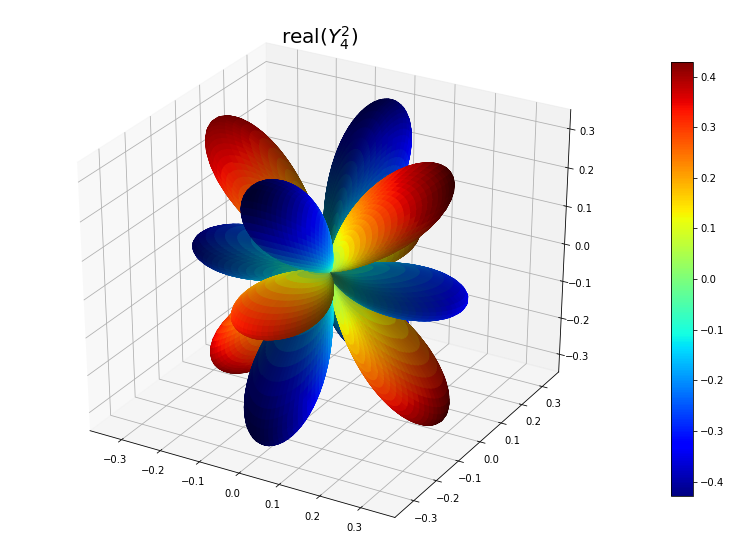

In [14]:
l = 4    # degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^2_ 4)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

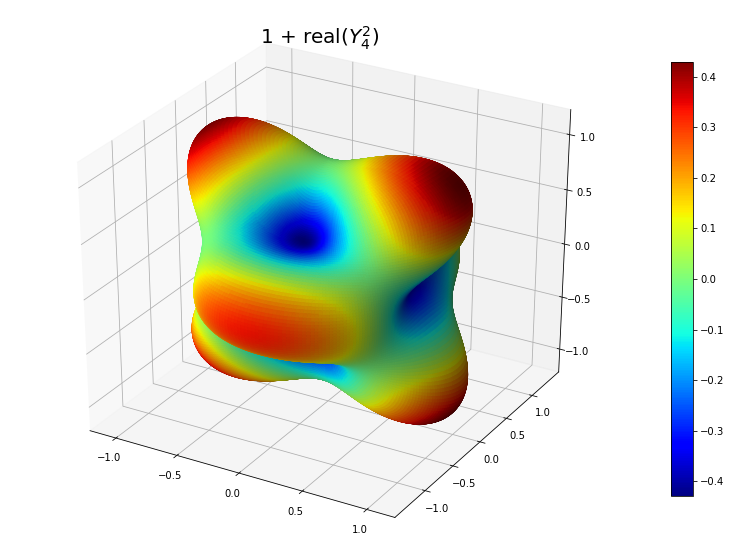

In [15]:
l = 4    # degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:300j, 0:np.pi:150j]
R = sp.sph_harm(m, l, PHI, THETA).real

s = 1
X = (s*R+1) * np.sin(THETA) * np.cos(PHI)
Y = (s*R+1) * np.sin(THETA) * np.sin(PHI)
Z = (s*R+1) * np.cos(THETA)

norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('1 + real$(Y^2_ 4)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

In [16]:

# Coordinate arrays for the graphical representation
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi/2, np.pi/2, 50)
X, Y = np.meshgrid(x, y)

# Spherical coordinate arrays derived from x, y
# Necessary conversions to get Mollweide right
phi = x.copy()    # physical copy
phi[x < 0] = 2 * np.pi + x[x<0]
theta = np.pi/2 - y
PHI, THETA = np.meshgrid(phi, theta)

In [17]:
l = 4
m = 2
SH_SP = sp.sph_harm(m, l, PHI, THETA).real    # Plot just the real part

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import scipy.special as sp
from ipywidgets import interact

In [19]:
import matplotlib
#import numpy as np
#import scipy as sci
#import scipy.special as sp
#from ipywidgets import interact
#This is to enable bold Latex symbols in the matplotlib titles, according to:
#http://stackoverflow.com/questions/14324477/bold-font-weight-for-latex-axes-label-in-matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [ ]:
xlabels = ['$210^\circ$', '$240^\circ$','$270^\circ$','$300^\circ$','$330^\circ$',
           '$0^\circ$', '$30^\circ$', '$60^\circ$', '$90^\circ$','$120^\circ$', '$150^\circ$']

ylabels = ['$165^\circ$', '$150^\circ$', '$135^\circ$', '$120^\circ$', 
           '$105^\circ$', '$90^\circ$', '$75^\circ$', '$60^\circ$',
           '$45^\circ$','$30^\circ$','$15^\circ$']

fig, ax = plt.subplots(subplot_kw=dict(projection='mollweide'), figsize=(10,8))
im = ax.pcolormesh(X, Y , SH_SP)
ax.set_xticklabels(xlabels, fontsize=14)
ax.set_yticklabels(ylabels, fontsize=14)
ax.set_title('real$(Y^2_ 4)$', fontsize=20)
ax.set_xlabel(r'$\boldsymbol \phi$', fontsize=20)
ax.set_ylabel(r'$\boldsymbol{\theta}$', fontsize=20)
ax.grid()
fig.colorbar(im, orientation='horizontal');

In [21]:
%matplotlib inline

#from __future__ import division

import quantities as pq
import numpy as np
import matplotlib.pyplot as plt


In [22]:
print(repr(pq.constants.Planck_constant))
print(repr(pq.constants.Boltzmann_constant))

UnitConstant('Planck_constant', 6.62606896e-34 * s*J, 'h')
UnitConstant('Boltzmann_constant', 1.3806504e-23 * J/K, 'k')


In [23]:
def B(wl,T):
    '''wl is an array of wavelengths with units of length
    T is a temperature in Kelvin
    the result is an array of s.r. with units W/(m**2 * nm * sr)
    '''
    I = 2 * pq.constants.h * (pq.c)**2 / wl**5 *  \
        1 / (np.exp((pq.constants.h*pq.c \
        / (wl*pq.constants.k*T)).simplified)-1)
    return I.rescale(pq.watt/(pq.m**2 * pq.nm *pq.sr))

In [24]:
B( 5000 *pq.angstrom, 5780 *pq.K)

array(26421.6296097) * W/(m**2*nm*sr)

In [25]:
T1 = 4000 * pq.Kelvin
T2 = 5000 * pq.Kelvin
T3 = 6000 * pq.Kelvin
T4 = 7000 * pq.Kelvin

In [ ]:
wl = np.arange(10,2000,10) * pq.nm
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(wl, B(wl,T4), label='7000K')
ax.plot(wl, B(wl,T3), label='6000K')
ax.plot(wl, B(wl,T2), label='5000K')
ax.plot(wl, B(wl,T1), label='4000K')
ax.legend()
ax.set_title('Blackbody radiation')
ax.title.set_fontsize(20)
ax.set_xlabel('wavelength in nm')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('spectral radiance $(W m^{-2}nm^{-1}sr^{-1})$')
ax.yaxis.label.set_fontsize(15)
ax.axvspan(0,400,facecolor = 'violet',alpha = 0.6)
ax.axvspan(400,700, facecolor='yellow', alpha = 0.5)
ax.axvspan(700,2000, facecolor ='red', alpha = 0.3)
ax.text(150,6e4, 'UV', fontsize=30, color = 'b')
ax.text(1200,6e4, 'IR', fontsize=30, color = 'r')
ax.text(420,6e4, 'VISIBLE', fontsize=20, color = 'green')
plot.show()

In [27]:
print(repr(pq.constants.b))

UnitConstant('Wien_wavelength_displacement_law_constant', 0.0028977685 * m*K, 'b')


In [28]:
l_max = pq.constants.b/(9000 * pq.K)
print('%d Angstrom' %l_max.rescale(pq.angstrom))

3219 Angstrom


In [29]:
# Suppose that the radiation from a star has its maximum intensity at 400 nm

lmax  = 400 * pq.nm

T = pq.constants.b / lmax

print("Its effective temperature will be: %d K" %T.simplified)

Its effective temperature will be: 7244 K


In [30]:
print(pq.constants.sigma, '=', pq.constants.sigma.simplified)

1 sigma (Stefan_Boltzmann_constant) = 5.6704e-08 kg/(s**3*K**4)


In [31]:
# We will need the value of the radius of the Sun:
sun_radius = 695000000.0 * pq.m

l_sun = 3.839e26 * pq.watt

temp_sun = (l_sun/(4 * np.pi * sun_radius**2 * pq.constants.sigma))**(1./4)
print (temp_sun.simplified)

5779.047122922552 K


In [32]:
TCMB = 2.7255 *pq.K
lmax = pq.constants.b / TCMB
print (lmax.simplified)

0.0010632062006971199 m


In [ ]:
wl = np.arange(0.1,10,0.1) * pq.mm
I = B(wl,TCMB).rescale(pq.watt/(pq.m**2 * pq.mm * pq.sr))
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(wl, I*1e7)
ax.set_title('Blackbody spectrum at T = 2.7255 K \
\n (wavelength in mm)')
ax.title.set_fontsize(20)
ax.set_xlabel('Wavelength in mm')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Spectral Radiance ($10^{-7} W m^{-2} mm^{-1} sr^{-1}$)')
ax.yaxis.label.set_fontsize(15)
ax.grid()

In [34]:
def B_f(wf,T):
    '''wf is an array of frequencies with units in GHz
    T is a temperature in Kelvin.
    It returns an array of spectral radiances 
    with units W/(m**2 x GHz x sr)
    '''
    wf = wf.rescale(pq.hertz)
    I = 2 * pq.constants.h * wf**3 / pq.c**2 * 1 \
        / (np.exp((pq.constants.h*wf \
        / (pq.constants.k*T)).simplified)-1)
    return I.rescale(pq.watt/(pq.m**2 * pq.gigahertz *pq.sr))

In [35]:
B_f(10**13*pq.hertz, 7000*pq.K)

array(0.20777705) * W/(m**2*sr*GHz)

In [ ]:
wf = np.arange(0.1,1000,1)* pq.gigahertz
I = B_f(wf,TCMB)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(wf, I*10**9) # Scale the units
ax.set_title('Blackbody spectrum at T = 2.725K \
 \n (Frequencies en GHz)')
ax.title.set_fontsize(20)
ax.set_xlabel(r'Frequence $ \nu \; (GHz)$')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Spectral Radiance   $(10^{-9} W m^{-2} GHz^{-1} sr^{-1})$')
ax.yaxis.label.set_fontsize(15)
ax.grid()

In [37]:
#Conversion of 160 GHz to cm**(-1)

frec = 160 * pq.gigahertz
wl = pq.c  / frec
print('wavelength in cm = ', wl.rescale(pq.cm))
k = 1/( wl.rescale(pq.cm))
print('wavenumber in cycles per cm = ', k)

wavelength in cm =  0.18737028625000005 cm
wavenumber in cycles per cm =  5.337025523170431 1/cm


In [38]:
# The conversion can be made easier
# just by dividing by the speed of light.
fec_in_wave_number = (frec/pq.c).rescale(1/pq.cm)
print (fec_in_wave_number)

5.337025523170432 1/cm


In [39]:
def B_k(wk,T):
    '''wk is an array of frequencies with units in cm^(-1)
    T is a temperature in Kelvin.
    It returns an array of spectral radiances 
    with units W/(m**2 x cm**(-1) x sr)
    '''
    wk = wk.rescale(1/pq.m)
    I = 2 * pq.constants.h * pq.c**2 * wk**3  * 1 \
        / (np.exp((pq.constants.h*pq.c*wk \
        / (pq.constants.k*T)).simplified)-1)
    return I.rescale(pq.watt/(pq.m**2 * pq.cm**(-1)*pq.sr))

In [40]:
f = 5.35 * pq.cm**(-1)
B_k(f, TCMB)

array(1.15083681e-07) * cm*W/(m**2*sr)

In [ ]:
wk = np.arange(0.1,20,0.1) / pq.cm
I = B_k(wk,TCMB)
I = I*10**7 # We express the units in multiples of 10^(-7)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(wk, I)
ax.set_title('Blackbody spectrum at T = 2.7255K \
 \n (Frequencies in $cm^{-1}$)')
ax.title.set_fontsize(20)
ax.set_xlabel('Frequency (cycles / cm )')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Spectral Radiance $(10^{-7}W m^{-2} (cm^{-1})^{-1}sr^{-1})$')
ax.yaxis.label.set_fontsize(15)
ax.grid()

In [ ]:
df = pd.read_table('../data/firas_monopole_spec_v1.txt', 
    skiprows=18, sep='\s+', header=None, 
    names =['freq', 'I', 'residual', 'uncert', 'poles'])

In [ ]:
df[0:10]

In [ ]:
wf = np.arange(0.1,1000,1)* pq.gigahertz
I = B_f(wf,TCMB)
I = I.rescale(MJy*pq.sr**(-1)) # conversion to MJy * sr**(-1)
wk = (wf/pq.c).rescale(1/pq.cm) # convert freq. to 1/cm

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(wk, I)
ax.set_title('Blackbody spectrum at T = 2.725K \
\n with data from the COBE satellite')
ax.title.set_fontsize(20)
ax.set_xlabel('Frequency (cycles/cm)')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Spectral Radiance ($MJy \, sr^{-1}$)')
ax.yaxis.label.set_fontsize(15)
ax.set_xlim(0,25)
ax.set_ylim(0,400)

ax.scatter(df['freq'], df['I'],c='red', s= 50)
ax.grid()

In [44]:
%matplotlib inline
#from __future__ import division

import numpy as np
import healpy as hp
import astroML

#This removes some nasty deprecation warnings that do not interfere with the execution
import warnings
warnings.filterwarnings('ignore')

# This IPython magic generates a table with version information
#https://github.com/jrjohansson/version_information
#%load_ext version_information
%version_information numpy, healpy, astroML, astroPy

UsageError: Line magic function `%version_information` not found.


In [45]:
for NSIDE in 2.**np.arange(6):
    print('The number of pixels for NSIDE = %2d is %5d' %(NSIDE, hp.nside2npix(NSIDE)))

The number of pixels for NSIDE =  1 is    12
The number of pixels for NSIDE =  2 is    48
The number of pixels for NSIDE =  4 is   192
The number of pixels for NSIDE =  8 is   768
The number of pixels for NSIDE = 16 is  3072
The number of pixels for NSIDE = 32 is 12288


In [46]:
ipix = np.arange(hp.nside2npix(NSIDE))
print('The numbering of the pixels for NSIDE = %d is: \n' %NSIDE, ipix)

theta, phi = hp.pix2ang(NSIDE,ipix)
print('\n array theta = ', theta/np.pi, 'radians')
print('\n array phi = ', phi/np.pi, 'radians')

The numbering of the pixels for NSIDE = 32 is: 
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 1.2285e+04 1.2286e+04 1.2287e+04]


TypeError: ufunc '_pix2ang_ring' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [47]:
NSIDE = 1
hp.ang2pix(NSIDE, np.pi/2, np.pi)

6

In [48]:
# If arrays of the same length: the matching is element to element
theta = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4])
phi = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
hp.ang2pix(NSIDE, theta, phi)

array([ 0,  1,  6, 11])

In [49]:
# Then the numpy broadcasting is possible,
# and returns a 2D array of pixel numbers
theta2 = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4]).reshape(-1,1)
phi2 = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 3.5*np.pi/2])
hp.ang2pix(NSIDE, theta2, phi2)

array([[ 0,  1,  2,  3,  3],
       [ 0,  1,  2,  3,  3],
       [ 4,  5,  6,  7,  4],
       [ 8,  9, 10, 11, 11]])

In [ ]:
npixels = hp.nside2npix(32)
np.random.seed(0)
test = np.random.rand(npixels)
hp.mollview(test, min=0, max=1,
            title = 'Mollweide projection test',
            unit='This is a description of the measurement unit')

In [ ]:
NSIDE = 3
npixels = hp.nside2npix(NSIDE)
img = np.linspace(0, 255, num=npixels)
index = np.arange(npixels)
theta, phi= hp.pix2ang(NSIDE,index)
hp.mollview(img, min=0, max = 255, unit='Range of values')
hp.projscatter(theta, phi)
for i in index:
    hp.projtext(theta[i]-0.05, phi[i], i)

In [52]:
from astroML.datasets import fetch_wmap_temperatures
wmap_unmasked = fetch_wmap_temperatures(masked=False)
wmap_unmasked.shape

[========================================]  24.01Mb / 24.01Mb   
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


(3145728,)

In [53]:
hp.nside2npix(512)

3145728

In [ ]:
hp.mollview(wmap_unmasked, min=-1, max=1, 
            title='Unmasked WMAP data \n in galactic coordinates',
            unit=r'$\Delta$T (mK)', xsize = 200)

In [ ]:
hp.mollview(wmap_unmasked, min=-1, max=1, 
            title='Unmasked WMAP data \n in equatorial coordinates',
            coord='GC', rot=(180,0),
            unit=r'$\Delta$T (mK)', xsize = 200)
hp.graticule()

hp.projtext(180, 2,'RA=180', lonlat=True)
hp.projtext(90, 2, 'RA=90', lonlat=True)
hp.projtext(270, 2, 'RA=270', lonlat=True);